In [17]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score 
import matplotlib.pyplot as plt
# import seaborn as sns

In [18]:
class RidgeRegression:
  def __init__(self):
    self.w = None
  
  def fit(self, X, y, alpha):
    X = np.c_[np.ones(X.shape[0]), X]
    xTranspose = X.T
    A = xTranspose @ X
    I = np.identity(A.shape[0])
    c = xTranspose @ y
    self.w = np.linalg.inv(A + alpha * I) @ c
  
  def predict(self, X):
    X = np.c_[np.ones(X.shape[0]), X]
    return X @ self.w
    

In [19]:
class LassoRegression:

  def soft_threshold(rho, alpha):
    if rho < alpha:
      return rho + alpha
    elif rho > alpha:
      return rho - alpha
    return 0
  
  def coordinate_descent(self,
                         X,
                         y,
                         theta,
                         alpha = 0.1,
                         n_iterations = 1000,
                         intercept = False):
    # The intercept parameter allows to specify whether or not we regularize theta_0
    X = np.array(X)
    y = np.array(y)
 
    m, n = X.shape
    X /= (np.linalg.norm(X, axis=0))

    for _ in range(n_iterations):
      for j in range(n):
        X_j = X[:,j].reshape(-1, 1)
        y_pred = X @ theta
        rho = X_j.T @ (y - y_pred + theta[j] * X_j)

        if intercept:
          if j == 0:
            theta[j] = rho
          else:
            theta[j] = self.soft_threshold(rho, alpha)
        else:
          theta[j] = self.soft_threshold(rho, alpha)
    return theta.flatten()
  
  def predict(self, X, theta):
    return X @ theta

[Ridge] Alpha: 0.0001 | Mean Squared Error: 2859.6993471868777 | R2 Score: 0.5177479163757711
[Ridge] Alpha: 0.001 | Mean Squared Error: 2859.9427610312227 | R2 Score: 0.5177068677131786
[Ridge] Alpha: 0.01 | Mean Squared Error: 2866.3415022459676 | R2 Score: 0.5166278010321241
[Ridge] Alpha: 0.1 | Mean Squared Error: 2890.452476207888 | R2 Score: 0.5125617905814857
[Ridge] Alpha: 1 | Mean Squared Error: 3254.257147283306 | R2 Score: 0.4512107395239906
[Ridge] Alpha: 10 | Mean Squared Error: 4821.336481831895 | R2 Score: 0.18694265307848879
[Ridge] Alpha: 100 | Mean Squared Error: 6553.583527548504 | R2 Score: -0.10517887639995904


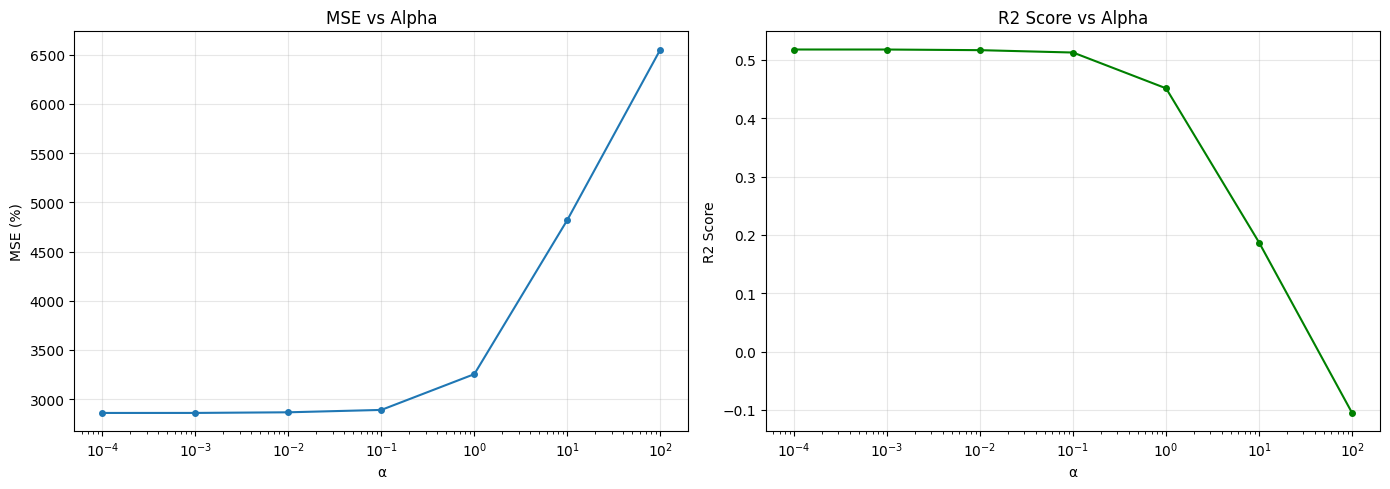

'\ntheta = lasso.coordinate_descent(data, target, np.zeros(data.shape[1]), alpha=0.1, n_iterations=1000, intercept = True)\ny_pred_lasso = lasso.predict(data, theta)\nlasso_mse = mean_squared_error(target, y_pred_lasso)\nlasso_r2 = r2_score(target, y_pred_lasso)\nprint("[Lasso] Mean Squared Error:", lasso_mse)\nprint("[Lasso] R2 Score:", lasso_r2)\n'

In [20]:
data = pd.read_csv("../data/diabetes.csv")
# sns.heatmap(data.corr(), annot=True)
target = data["target"]
data.drop(columns=["target"], inplace=True)
ridge = RidgeRegression()
lasso = LassoRegression()

alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
testMse = []
testR2 = []

def alphaSweep():
  for a in alphas:
    ridge.fit(data, target, a)
    y_pred = ridge.predict(data)
    testMse.append(mean_squared_error(target, y_pred))
    testR2.append(r2_score(target, y_pred))
    print(f"[Ridge] Alpha: {a} | Mean Squared Error: {testMse[-1]} | R2 Score: {testR2[-1]}")

alphaSweep()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(alphas, testMse, marker='o', markersize=4)
ax1.set_xscale('log')
ax1.set_xlabel('α')
ax1.set_ylabel('MSE (%)')
ax1.set_title('MSE vs Alpha')
ax1.grid(True, alpha = 0.3)

ax2.plot(alphas, testR2, marker='o', markersize=4, color='green')
ax2.set_xscale('log')
ax2.set_xlabel('α')
ax2.set_ylabel('R2 Score')
ax2.set_title('R2 Score vs Alpha')
ax2.grid(True, alpha = 0.3)

plt.tight_layout()
plt.savefig('../images/ridge_metrics.png')
plt.show()
"""
theta = lasso.coordinate_descent(data, target, np.zeros(data.shape[1]), alpha=0.1, n_iterations=1000, intercept = True)
y_pred_lasso = lasso.predict(data, theta)
lasso_mse = mean_squared_error(target, y_pred_lasso)
lasso_r2 = r2_score(target, y_pred_lasso)
print("[Lasso] Mean Squared Error:", lasso_mse)
print("[Lasso] R2 Score:", lasso_r2)
"""